In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
import shap

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Big O comparison

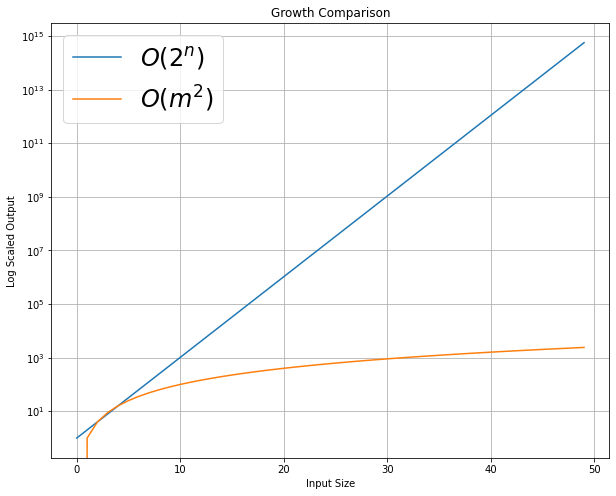

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_yscale('log')
ax.grid(True)
ax.plot(np.arange(50), 2.0**np.arange(50), label=r"$O(2^n)$")
ax.plot(np.arange(50), np.arange(50)**2.0, label=r"$O(m^2)$")
ax.set_ylabel("Log Scaled Output")
ax.set_xlabel("Input Size")
ax.set_title("Growth Comparison")
ax.legend(prop={'size':24})
fig.tight_layout

# plt.savefig("BigO.png")

We'll compare with permutation importance from [this](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py) page in the sklearn documentation.

In [4]:
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.columns, X_test = data.feature_names, data.feature_names
xgb_model = XGBClassifier().fit(X_train, y_train)

In [5]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train)

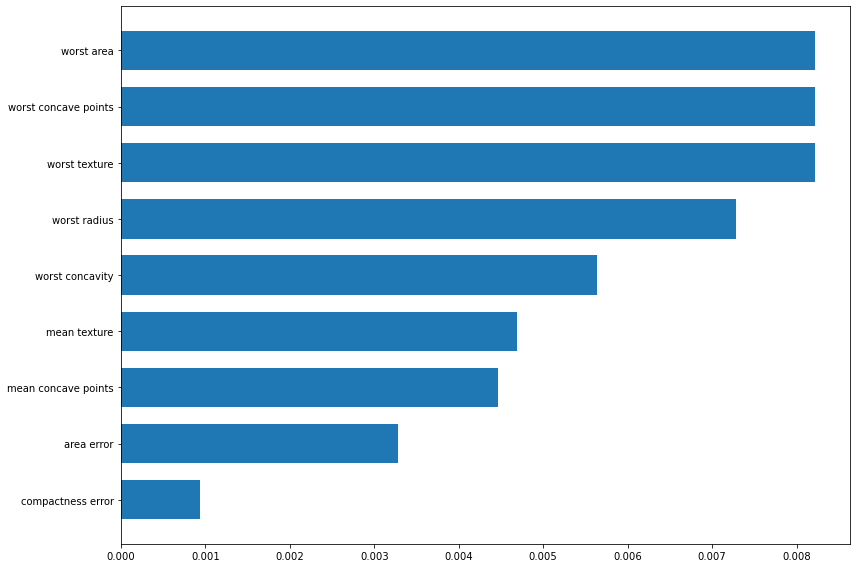

In [6]:
result = permutation_importance(xgb_model, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(X.columns[perm_sorted_idx][-9:], result.importances_mean[perm_sorted_idx][-9:], height=0.7)
fig.tight_layout()
# plt.savefig("PermutationImp.png")

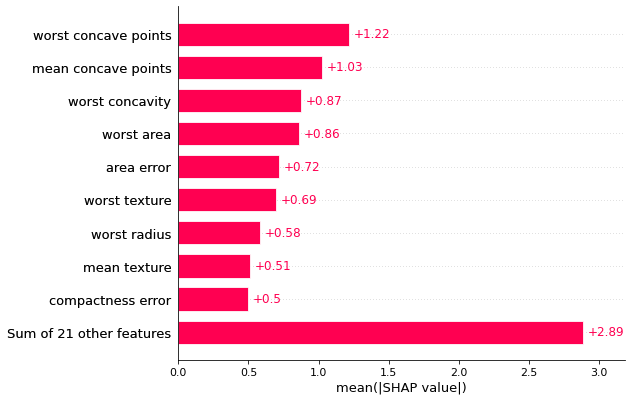

In [7]:
shap.plots.bar(shap_values, show=False)
# plt.savefig("ShapBar")

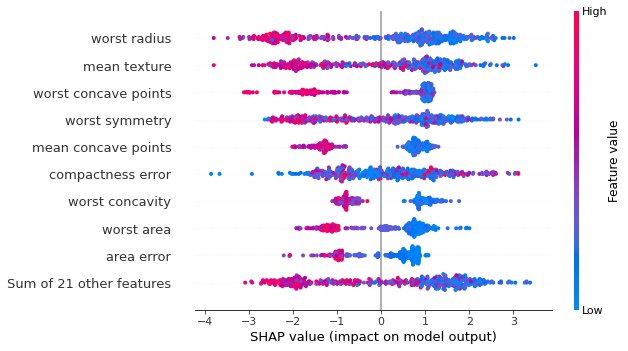

In [12]:
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("Shapbeeswarm.png", bbox_inches='tight')